In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from PIL import Image


In [2]:
image = plt.imread('car-1.jpg') # Loading the image

In [3]:
def ICV_rgb2gray(image):
    '''
    == Input ==
    image  : color image of shape (height, width)
    
    == Output ==  
    gray : Input image converted to grayscale image
    '''

    # r = image[:,:,0]
    # g= image[:,:,1]
    # b= image[:,:,2]
    gray = (0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2])//3
   

    return gray

(256, 256)


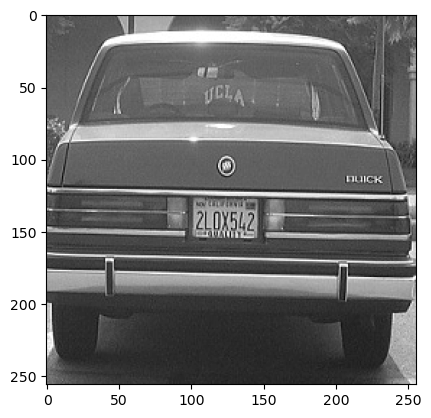

In [4]:
img = ICV_rgb2gray(image)
print(img.shape)
plt.imshow(img ,cmap = plt.cm.gray)

In [5]:
def ICV_target_size(img_size, kernel_size):
    num_pixels = 0
    
    for i in range(img_size):
        # Add the kernel size to the current i
        new_i= i + kernel_size
        if new_i <= img_size:
            num_pixels += 1
            
    return num_pixels

In [6]:
l = np.array([[1, 1, 1],     #Defining a kernel 
    [1,  -8, 1],
    [1, 1, 1]])

# l = np.array([[1, 2, 1],
#     [2, 4, 2],
#     [1, 2, 1]
# ]) / 16

In [7]:
def ICV_flipkernel(kernel):
    x = kernel[::-1,:]
    y = x[:,::-1]
    return y

In [9]:
def ICV_normalize_kernel(kernel):
    add = np.sum(kernel)
    if add != 0:
        norm = kernel/add
    else:
        norm = kernel
    return norm

In [10]:
prin = ICV_normalize_kernel(l)
print(prin)

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


In [11]:
x = ICV_target_size(img.shape[1],l.shape[1])
print (x)
    

254


In [12]:
def ICV_convolution(img,kernel,stride=1):
    
    y_targ_size = int(((img.shape[0]-kernel.shape[0])/stride) + 1)        #Using the equation for target y/x = ((y/x - kernel size)/stride + 1)
    x_targ_size= int(((img.shape[1]-kernel.shape[1])/stride) + 1)
    k = kernel.shape[0]
    
    conv_result = np.zeros(shape=(y_targ_size,x_targ_size))
    
    for j in range(0,y_targ_size,stride):
        for i in range(0,x_targ_size - stride,stride):
            conv_result[j,i] = np.clip(np.abs(np.sum(kernel*img[j:j+k, i:i+k])), a_min=0, a_max=255)
    return conv_result
    

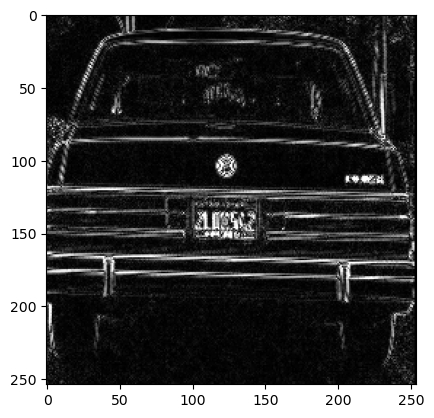

In [15]:
filter1 = ICV_convolution(img,ICV_flipkernel(l))
plt.imshow(filter1,cmap='gray')
matplotlib.image.imsave('filtered_img.jpg', filter1)

In [27]:
avg_kernel = np.array([[1 ,1 ,1],
                      [1, 1 ,1],
                      [1 , 1, 1]])

avg_kernelf = ICV_normalize_kernel(ICV_flipkernel(avg_kernel))
print(avg_kernelf)
sharpen_kernel= np.array([[0 , -1, 0],
                          [-1, 5 , -1],
                          [0, -1, 0]])
sharpen = ICV_flipkernel(sharpen_kernel)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


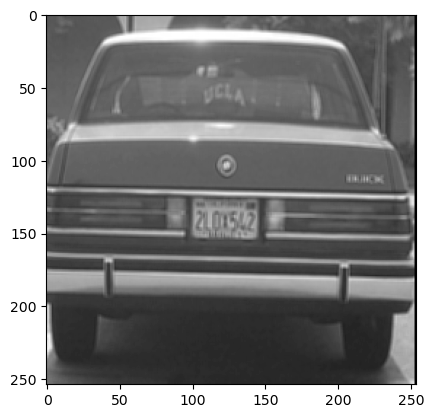

In [28]:
avg_output = ICV_convolution(img, avg_kernelf)
plt.imshow(avg_output, cmap= 'gray')

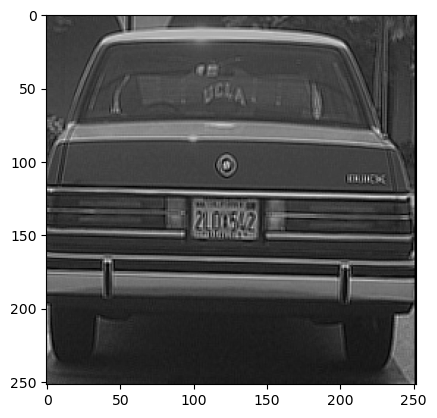

In [18]:
sharpen_avg = ICV_convolution(avg_output, ICV_normalize_kernel(sharpen))
plt.imshow(sharpen_avg, cmap = 'gray')
matplotlib.image.imsave('sharpen_avg.jpg', sharpen_avg)

In [19]:
kernel_A = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])

kernel_A = ICV_normalize_kernel(ICV_flipkernel(kernel_A))
print(kernel_A)
kernel_B= np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

kernel_B = ICV_normalize_kernel(ICV_flipkernel(kernel_B))
print(kernel_B)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


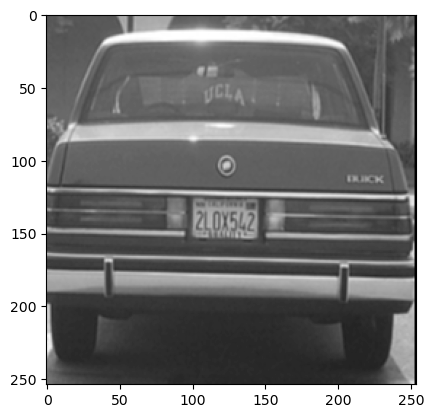

In [20]:
ImgA = ICV_convolution(img,kernel_A)
plt.imshow(ImgA, cmap = 'gray')
matplotlib.image.imsave('ImagexA.jpg', ImgA)

(array([  254., 10529., 11555., 20765.,  9152.,  2831.,  4406.,  3179.,
          922.,   923.]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <BarContainer object of 10 artists>)

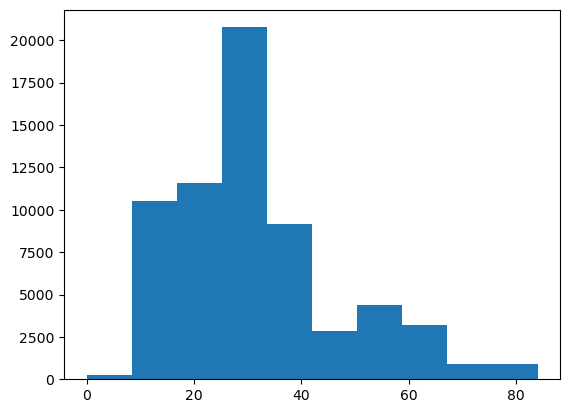

In [21]:
plt.hist(ImgA.flatten())

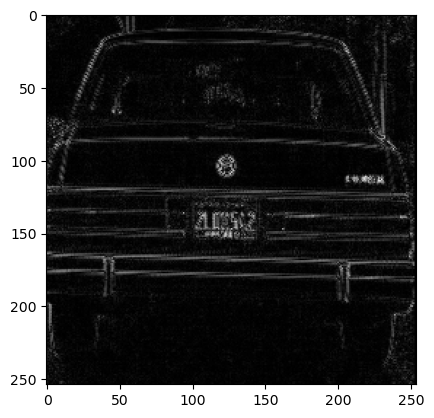

In [22]:
ImgB = ICV_convolution(img,kernel_B)
plt.imshow(ImgB, cmap= 'gray')
matplotlib.image.imsave('ImagexB.jpg',ImgB)

(array([5.4999e+04, 5.1510e+03, 2.6230e+03, 9.6700e+02, 4.9500e+02,
        1.5300e+02, 7.8000e+01, 3.5000e+01, 1.2000e+01, 3.0000e+00]),
 array([  0. ,  20.5,  41. ,  61.5,  82. , 102.5, 123. , 143.5, 164. ,
        184.5, 205. ]),
 <BarContainer object of 10 artists>)

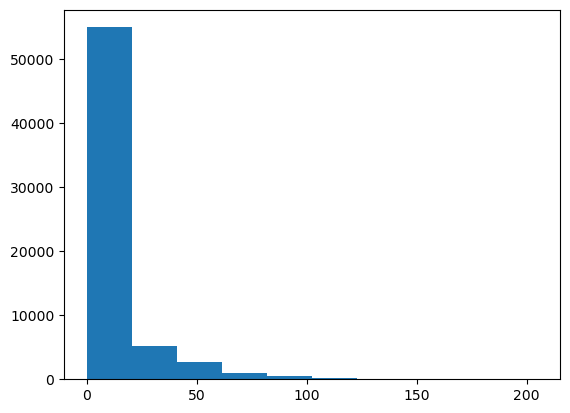

In [23]:
plt.hist(ImgB.flatten())

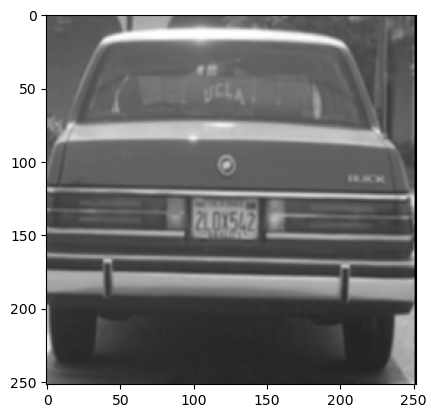

In [24]:
"""Question 2-d
   First part where image is convolved twice with kernel A"""
ImgAxA = ICV_convolution(ImgA,kernel_A)
plt.imshow(ImgAxA, cmap = 'gray')
matplotlib.image.imsave('ImageAxA.jpg',ImgAxA)

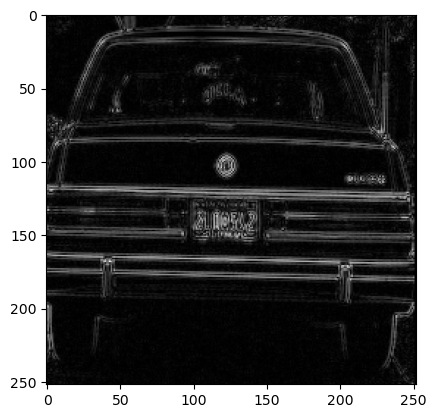

In [25]:
"""Question 2-d
   Second part where image after kernel A is convolved with kernel B"""
ImgAxB = ICV_convolution(ImgA,kernel_B)
plt.imshow(ImgAxB, cmap = 'gray')
matplotlib.image.imsave('ImageAxB.jpg',ImgAxB)

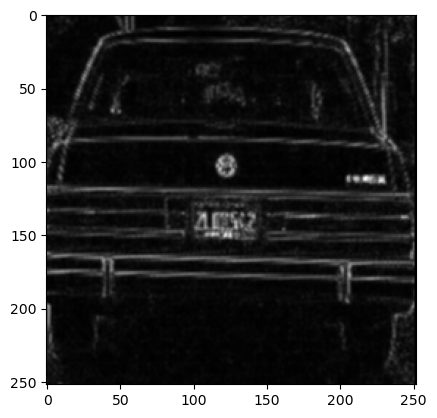

In [26]:
"""Question 2-d
   Second part where image after kernel B is convolved with kernel A"""
ImgBxA = ICV_convolution(ImgB,kernel_A)
plt.imshow(ImgBxA , cmap = plt.cm.gray)
matplotlib.image.imsave('ImageBxA.jpg',ImgBxA)